In [56]:
# Import libreries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import *

In [57]:
aapl_data = download_stock_data("META")
#aapl_data_clean = preprocess_data(aapl_data)
#aapl_predictions = model_stock_price(aapl_data_clean)

# Luego se puede iterar para las demás empresas:
companies = {
    'Apple': 'AAPL',
    'Microsoft': 'MSFT',
    'Amazon': 'AMZN',
    'Alphabet': 'GOOGL',
    'NVIDIA': 'NVDA'
}

# for company, ticker in companies.items():
#     data = download_stock_data(ticker)
#     data_clean = preprocess_data(data)
#     predictions = model_stock_price(data_clean)
#     mae, rmse = evaluate_model(predictions, data['Close'])
#     print(f'{company} - MAE: {mae}, RMSE: {rmse}')

# Cleaned data

In [58]:
# Normalizar los nombres de las columnas
apple_data = normalizar_nombres_columnas(aapl_data)

In [59]:
data_report = data_quality_report(aapl_data)

----- Informe de Calidad de Datos -----

Valores nulos por columna:
 open            0
high            0
low             0
close           0
volume          0
dividends       0
stock_splits    0
dtype: int64

Número de filas duplicadas: 0

Tipos de datos:
 open            float64
high            float64
low             float64
close           float64
volume            int64
dividends       float64
stock_splits    float64
dtype: object

Descripción estadística de las columnas numéricas:
               open         high          low        close        volume  \
count  2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean    211.348230   214.055541   208.738820   211.460931  2.323323e+07   
std     111.448860   112.850447   110.041954   111.464896  1.501454e+07   
min      72.581465    73.767887    71.783867    73.109879  5.467500e+06   
25%     130.606756   132.570839   129.380439   130.696487  1.466880e+07   
50%     179.858448   181.393843   177.714914   179.639130 

In [60]:
# Asegurarse de que el índice actual es un DateTimeIndex
apple_data.index = pd.to_datetime(apple_data.index)  # Convertir el índice en formato datetime si aún no lo es

# Añadir la columna 'date' que replica el índice actual
apple_data['date'] = apple_data.index

In [61]:
apple_data['log_return'] = np.log(apple_data['close'] / apple_data['close'].shift(1))
apple_data.dropna(inplace=True)  # Eliminar filas con NaN generados por shift

In [62]:
apple_data['volatility'] = apple_data['log_return'].rolling(window=30).std() * np.sqrt(30)
apple_data.dropna(inplace=True)  # Eliminar filas con NaN

In [63]:
apple_data['ma50'] = apple_data['close'].rolling(window=50).mean()
apple_data['ma100'] = apple_data['close'].rolling(window=100).mean()
apple_data.dropna(inplace=True)  # Eliminar filas con NaN

In [64]:
apple_data['volume_to_price'] = apple_data['volume'] / apple_data['close']

In [65]:
apple_data.dropna(inplace=True)

In [66]:
apple_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits',
       'date', 'log_return', 'volatility', 'ma50', 'ma100', 'volume_to_price'],
      dtype='object')

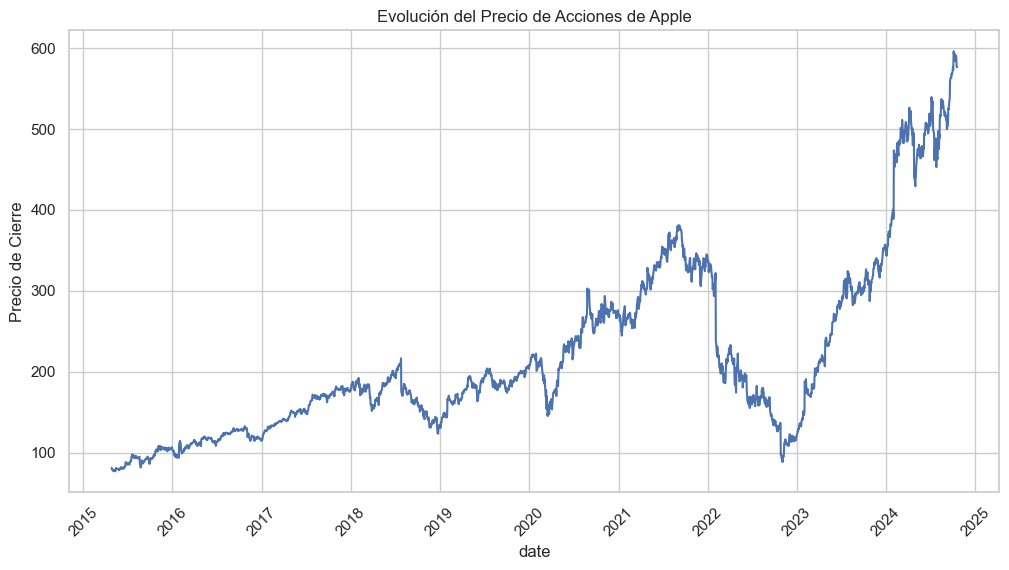

In [67]:



# Suponiendo que apple_data es un DataFrame de pandas
plt.figure(figsize=(12, 6))
plt.plot(apple_data['date'], apple_data['close'])
plt.xlabel('date')
plt.ylabel('Precio de Cierre')
plt.title('Evolución del Precio de Acciones de Apple')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [68]:
# Preprocesar los datos (ajuste por stock splits, dividendos, normalización, estandarización)
apple_adjusted, apple_normalized, apple_standardized = preprocess_data_dos(apple_data)

Preprocesamiento completo. Se han generado versiones con los datos ajustados, normalizados y estandarizados.


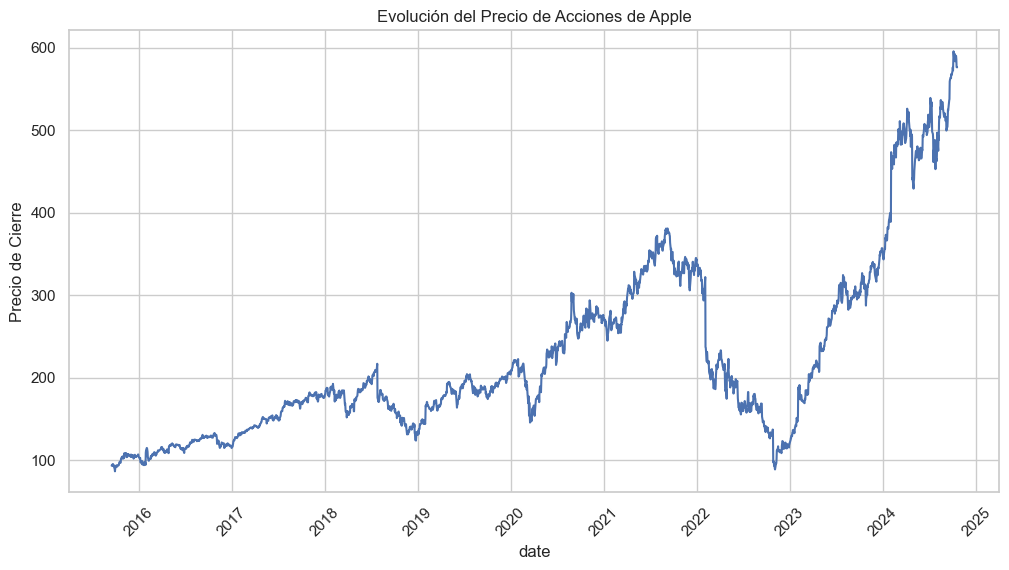

In [69]:

# Suponiendo que apple_data es un DataFrame de pandas
plt.figure(figsize=(12, 6))
plt.plot(apple_adjusted['date'], apple_adjusted['close'])
plt.xlabel('date')
plt.ylabel('Precio de Cierre')
plt.title('Evolución del Precio de Acciones de Apple')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

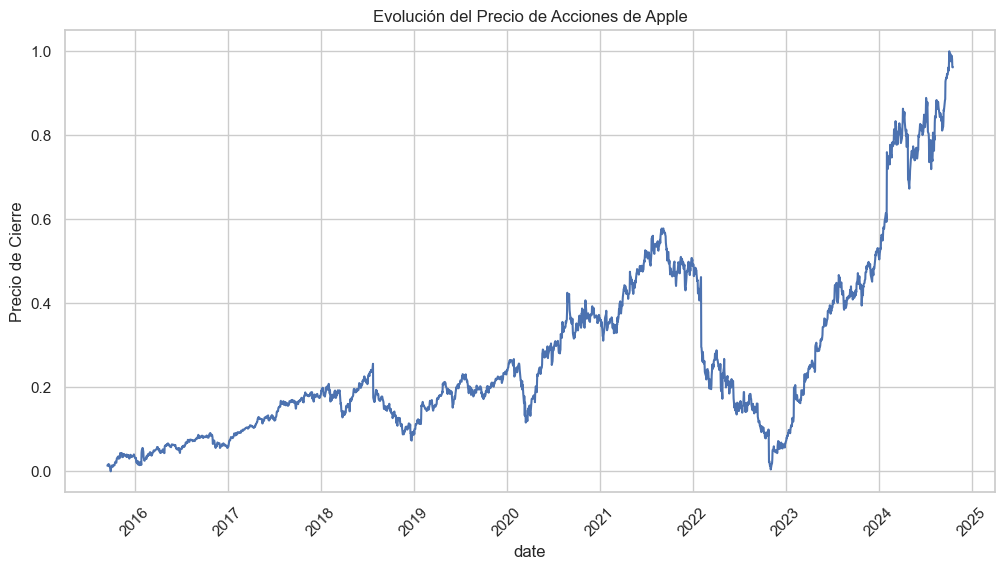

In [70]:

# Suponiendo que apple_data es un DataFrame de pandas
plt.figure(figsize=(12, 6))
plt.plot(apple_normalized['date'], apple_normalized['close'])
plt.xlabel('date')
plt.ylabel('Precio de Cierre')
plt.title('Evolución del Precio de Acciones de Apple')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

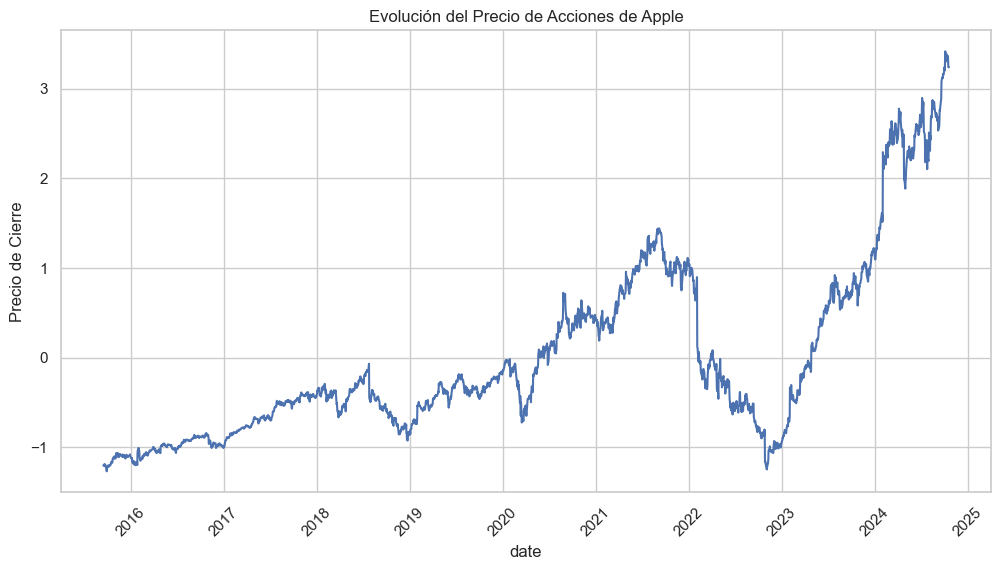

In [71]:

# Suponiendo que apple_data es un DataFrame de pandas
plt.figure(figsize=(12, 6))
plt.plot(apple_standardized['date'], apple_standardized['close'])
plt.xlabel('date')
plt.ylabel('Precio de Cierre')
plt.title('Evolución del Precio de Acciones de Apple')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

## EDA Análisis Exploratorio de Datos

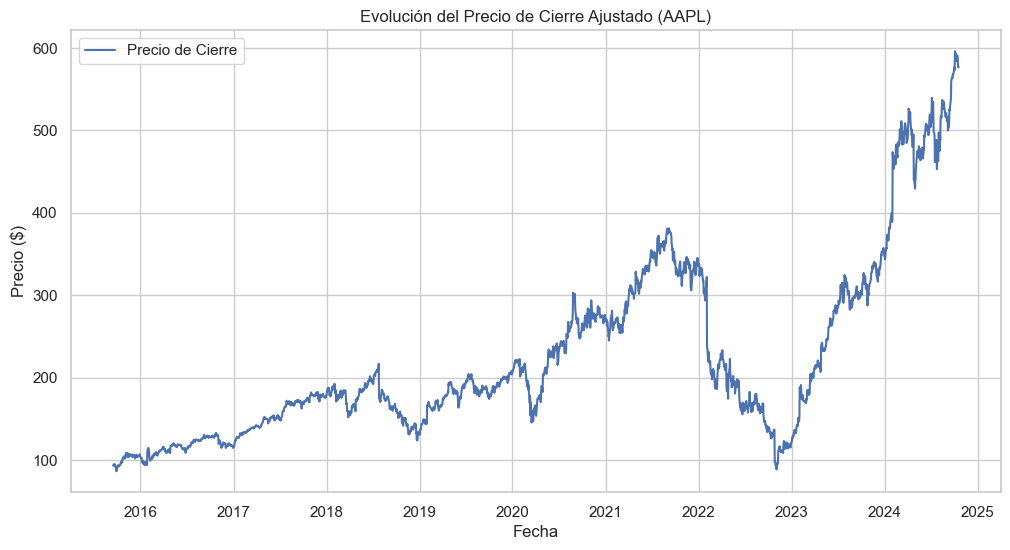

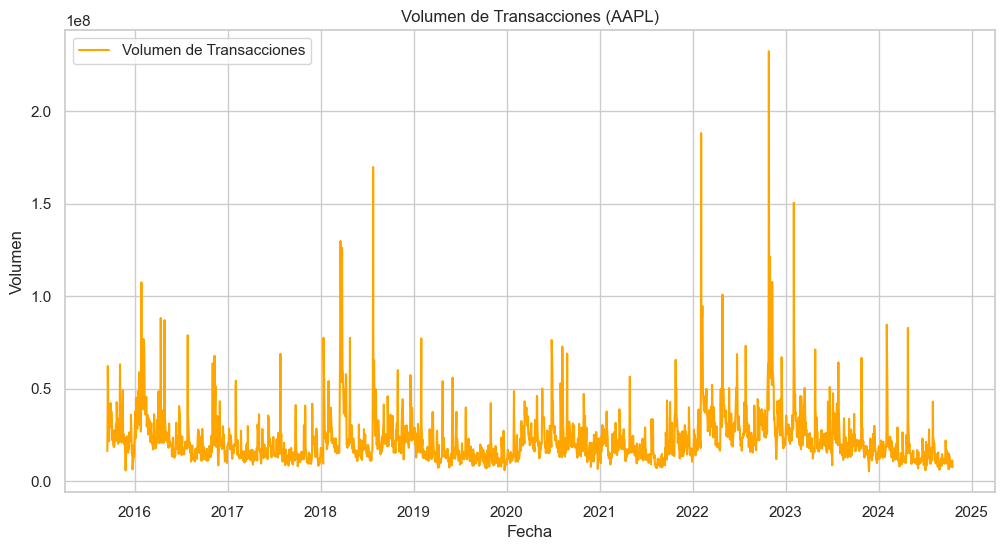

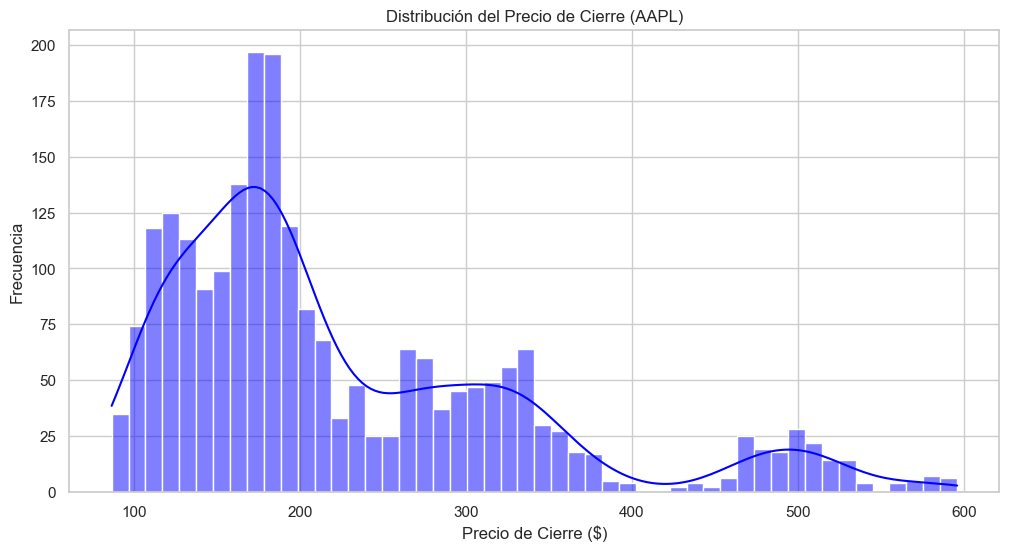

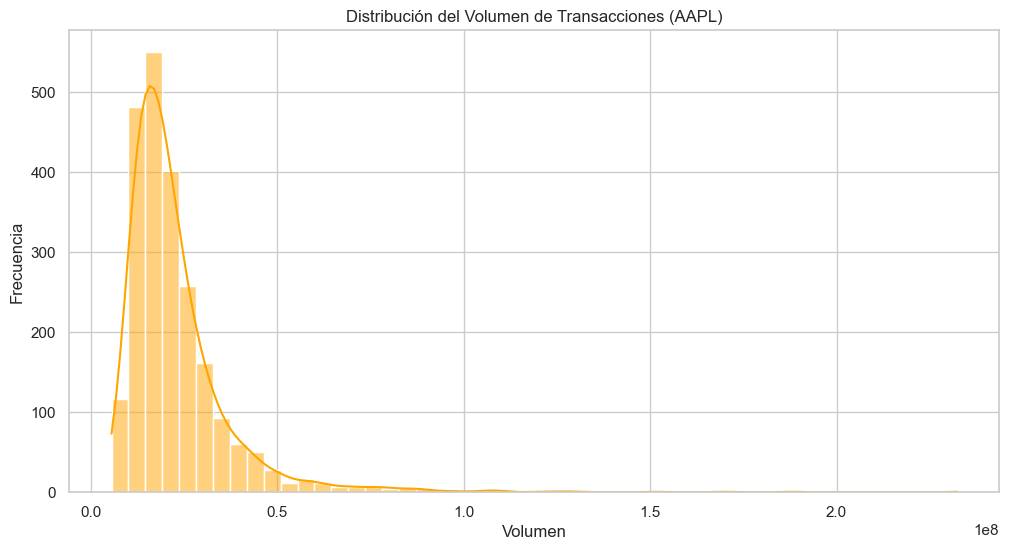

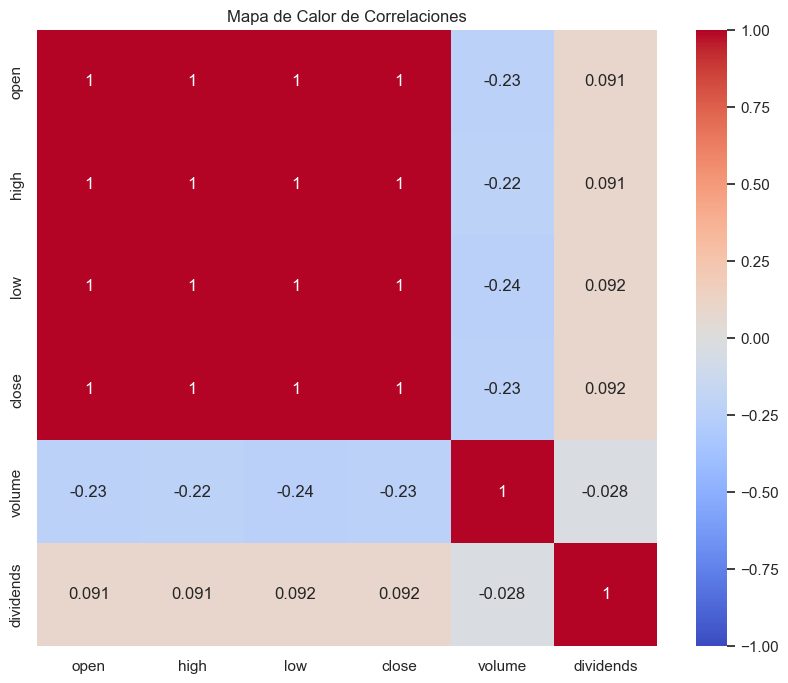

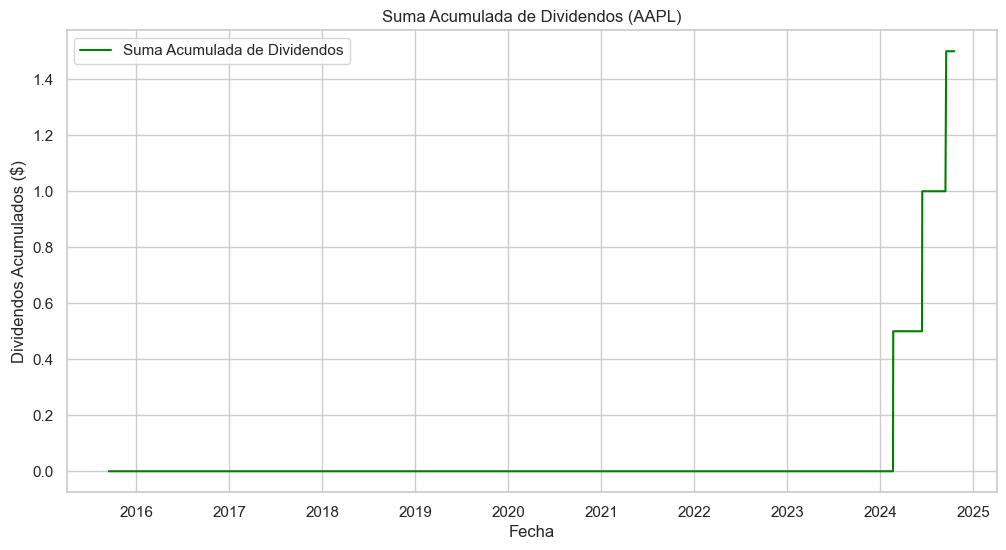

EDA completado.


In [72]:
#Probaremos los modelos tanto con los datos sin normalizar como con los datos normalizados y estandarizados, para comparar su rendimiento.
# Realizamos el EDA en los datos ajustados
perform_eda(apple_adjusted)

## Modelo

In [73]:
apple_adjusted

,open,high,low,close,volume,dividends,stock_splits,date,log_return,volatility,ma50,ma100,volume_to_price,dividend_return
Date,,,,,,,,,,,,,,
2015-09-16 00:00:00-04:00,92.621127,93.319023,92.351934,93.169472,16321200,0.0,0.0,2015-09-16 00:00:00-04:00,0.005903,0.125559,91.719444,86.651304,175177.552207,0.0
2015-09-17 00:00:00-04:00,93.089719,95.223294,92.621129,94.056801,27841800,0.0,0.0,2015-09-17 00:00:00-04:00,0.009479,0.123275,91.892722,86.775231,296010.493135,0.0
2015-09-18 00:00:00-04:00,92.920228,94.904260,92.770685,94.116631,62300000,0.0,0.0,2015-09-18 00:00:00-04:00,0.000636,0.122538,92.062611,86.912019,661944.649242,0.0
2015-09-21 00:00:00-04:00,94.335967,96.200349,94.236261,95.263176,28790000,0.0,0.0,2015-09-21 00:00:00-04:00,0.012109,0.122823,92.214155,87.062366,302215.412289,0.0
2015-09-22 00:00:00-04:00,93.488520,94.395792,91.644075,92.680954,36888900,0.0,0.0,2015-09-22 00:00:00-04:00,-0.027480,0.125955,92.271183,87.203840,398020.288054,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-14 00:00:00-04:00,594.219971,600.099976,589.960022,590.419983,8252000,0.0,0.0,2024-10-14 00:00:00-04:00,0.000796,0.076487,539.216199,515.583182,13976.491716,1.5
2024-10-15 00:00:00-04:00,590.159973,590.609985,580.140015,586.270020,9564200,0.0,0.0,2024-10-15 00:00:00-04:00,-0.007054,0.073788,541.436067,516.777176,16313.643341,1.5
2024-10-16 00:00:00-04:00,581.400024,582.080017,574.030029,576.789978,11268400,0.0,0.0,2024-10-16 00:00:00-04:00,-0.016302,0.076657,543.099485,517.896330,19536.400474,1.5


In [74]:
apple_adjusted.columns

Index(['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits',
       'date', 'log_return', 'volatility', 'ma50', 'ma100', 'volume_to_price',
       'dividend_return'],
      dtype='object')

In [75]:
# Función para crear características de retardos
def create_lagged_features(df, target, lags=5):
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df[target].shift(lag)
    df.dropna(inplace=True)  # Eliminamos valores NaN
    return df

# Suponiendo que 'apple_adjusted' es el dataframe original con las características originales
# Aplicar la función de retardos en 'close'
apple_adjusted = create_lagged_features(apple_adjusted, 'close', lags=5)
apple_adjusted.columns

Index(['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits',
       'date', 'log_return', 'volatility', 'ma50', 'ma100', 'volume_to_price',
       'dividend_return', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5'],
      dtype='object')

In [76]:
# borramos la columna date

#apple_adjusted.drop('date', axis=1, inplace=True)
apple_adjusted.columns

Index(['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits',
       'date', 'log_return', 'volatility', 'ma50', 'ma100', 'volume_to_price',
       'dividend_return', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5'],
      dtype='object')

In [77]:
# Asegúrate de que la columna de fechas esté en formato de índice y tenga una frecuencia establecida
apple_adjusted['date'] = pd.to_datetime(apple_adjusted['date'])  # Asegúrate de que la columna sea tipo datetime
apple_adjusted.set_index('date', inplace=True)       # Establecer la columna de fechas como índice

# Ahora establecer la frecuencia de las fechas, por ejemplo, 'M' para datos mensuales
df = apple_adjusted.asfreq('ME')  # O asfreq('D') para datos diarios

# Si tienes datos mensuales, usa 'M', si son diarios, usa 'D', ajusta según sea necesario


In [78]:
print(df.isnull().sum())  # Verificar si hay valores nulos
print(df.index)  # Verificar si las fechas están completas
#Eliminar nulos

df.dropna(inplace=True)

open               32
high               32
low                32
close              32
volume             32
dividends          32
stock_splits       32
log_return         32
volatility         32
ma50               32
ma100              32
volume_to_price    32
dividend_return    32
lag_1              32
lag_2              32
lag_3              32
lag_4              32
lag_5              32
dtype: int64
DatetimeIndex(['2015-09-30 00:00:00-04:00', '2015-10-31 00:00:00-04:00',
               '2015-11-30 00:00:00-05:00', '2015-12-31 00:00:00-05:00',
               '2016-01-31 00:00:00-05:00', '2016-02-29 00:00:00-05:00',
               '2016-03-31 00:00:00-04:00', '2016-04-30 00:00:00-04:00',
               '2016-05-31 00:00:00-04:00', '2016-06-30 00:00:00-04:00',
               ...
               '2023-12-31 00:00:00-05:00', '2024-01-31 00:00:00-05:00',
               '2024-02-29 00:00:00-05:00', '2024-03-31 00:00:00-04:00',
               '2024-04-30 00:00:00-04:00', '2024-05-31 00:00

Epoch 1/50


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0094 - val_loss: 0.0017
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 8.3031e-04 - val_loss: 0.0011
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 6.8086e-04 - val_loss: 5.4468e-04
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 6.6913e-04 - val_loss: 0.0010
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 7.0258e-04 - val_loss: 0.0014
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 6.0670e-04 - val_loss: 5.0150e-04
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 6.8149e-04 - val_loss: 8.1306e-04
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 4.9682e-04 - val_loss: 4.9346e-04
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 5.6379e-04 - val_loss: 5.0956e-04
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 4.6725e-04 - val_loss: 0.0019
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 5.2896e-04 - val_loss: 4.5319e-04
Epoch 12/5

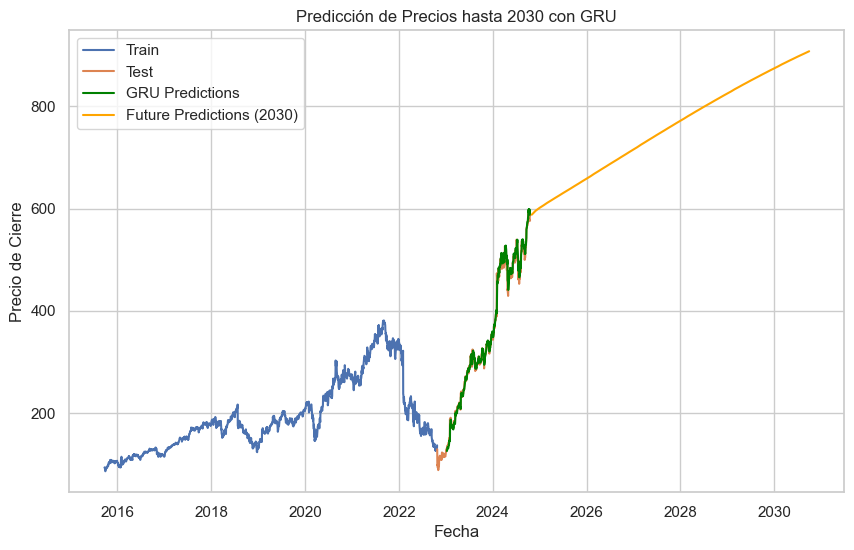

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler


# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(apple_adjusted[['close']])

# Preparar datos para GRU
def create_dataset(dataset, time_step=50):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Definir el tamaño de la ventana de tiempo
time_step = 50
X, y = create_dataset(scaled_data, time_step)

# Redimensionar los datos para que tengan la forma esperada por GRU
X = X.reshape(X.shape[0], X.shape[1], 1)

# Dividir los datos en entrenamiento y prueba (80% para entrenamiento, 20% para prueba)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Construcción del modelo GRU con regularización
model_gru = Sequential()

# Primera capa GRU con Dropout
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_gru.add(Dropout(0.2))

# Segunda capa GRU
model_gru.add(GRU(units=50, return_sequences=False))
model_gru.add(Dropout(0.2))

# Capa densa de salida
model_gru.add(Dense(1))

# Compilación del modelo
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo GRU
model_gru.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predicciones con el modelo entrenado
pred_gru = model_gru.predict(X_test)

# Invertir el escalado de las predicciones
pred_gru = scaler.inverse_transform(pred_gru.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Asegurarnos de que la longitud de las predicciones y las fechas coincidan
min_len = min(len(pred_gru), len(apple_adjusted.index[train_size + time_step:]))
pred_gru = pred_gru[:min_len]
x_dates = apple_adjusted.index[train_size + time_step:train_size + time_step + min_len]

# Predicción iterativa para hasta 2030
last_window = X_test[-1]  # Última ventana
n_future_steps = (2030 - 2024) * 12  # Predicción mensual hasta 2030

future_predictions = []
for _ in range(n_future_steps):
    next_pred = model_gru.predict(last_window.reshape(1, time_step, 1))
    future_predictions.append(next_pred[0, 0])
    last_window = np.append(last_window[1:], next_pred[0, 0]).reshape(time_step, 1)

# Invertir el escalado de las predicciones futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Crear un índice de fechas para las predicciones futuras
last_date = apple_adjusted.index[-1]
future_dates = pd.date_range(last_date, periods=n_future_steps, freq='ME')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(apple_adjusted.index[:train_size], apple_adjusted['close'][:train_size], label='Train')
plt.plot(apple_adjusted.index[train_size:], apple_adjusted['close'][train_size:], label='Test')
plt.plot(x_dates, pred_gru, label='GRU Predictions', color='green')
plt.plot(future_dates, future_predictions, label='Future Predictions (2030)', color='orange')
plt.title('Predicción de Precios hasta 2030 con GRU')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()


In [80]:
# Crear un DataFrame con las predicciones de prueba y las predicciones futuras
pred_gru_df = pd.DataFrame({
    'Fecha': np.concatenate([x_dates, future_dates]),
    'Predicciones_GRU': np.concatenate([pred_gru.flatten(), future_predictions.flatten()])
})

# Guardar el DataFrame en un archivo CSV
pred_gru_df.to_csv('predicciones_gru_hasta_2030_main5_meta.csv', index=False)

print("Predicciones almacenadas en 'predicciones_gru_hasta_2030_meta_main4.csv'")

Predicciones almacenadas en 'predicciones_gru_hasta_2030_meta_main4.csv'
